In [1]:
import os
import easydict
import torch
import torch.backends.cudnn as cudnn
import torch.nn.init as init
import torch.optim as optim
import torch.utils.data

from dataset import hierarchical_dataset, AlignCollate, Batch_Balanced_Dataset

opt = easydict.EasyDict({
    "exp_name": "test_01",
    "train_data": "/data/data/STARN/data_lmdb_release/training",
    "valid_data":"/data/data/STARN/data_lmdb_release/validation",
    "manualSeed": 1111,
    "workers": 16,
    "batch_size":768,
    "num_iter":300000,
    "valInterval":1,
    "saved_model":'',
    "FT":False,
    "adam":False,
    "lr":1,
    "beta1":0.9,
    "rho":0.95,
    "eps":1e-8,
    "grad_clip":5,
    "baiduCTC":False,
    "select_data":'ST',
    "batch_ratio":'1',
    "total_data_usage_ratio":'1.0',
    "batch_max_length":25,
    "imgW":100,
    "imgH":32,
    "rgb":False,
    "character":"0123456789abcdefghijklmnopqrstuvwxyz",
    "sensitive":False,
    "PAD":False,
    "data_filtering_off":False,
    "Transformation":"TPS",
    "FeatureExtraction":"ResNet",
    "SequenceModeling":"BiLSTM",
    "Prediction":'Attn',
    "num_fiducial":20,
    "input_channel":3,
    "output_channel":512,
    "hidden_size":256    
})

opt.select_data = opt.select_data.split('-')
opt.batch_ratio = opt.batch_ratio.split('-')

train_dataset = Batch_Balanced_Dataset(opt)



--------------------------------------------------------------------------------
dataset_root: /data/data/STARN/data_lmdb_release/training
opt.select_data: ['ST']
opt.batch_ratio: ['1']
--------------------------------------------------------------------------------
dataset_root:    /data/data/STARN/data_lmdb_release/training	 dataset: ST
sub-directory:	/ST	 num samples: 5522807
sub-directory:	/MJ/MJ_valid	 num samples: 802731
sub-directory:	/MJ/MJ_test	 num samples: 891924
sub-directory:	/MJ/MJ_train	 num samples: 7224586
num total samples of ST: 14442048 x 1.0 (total_data_usage_ratio) = 14442048
num samples of ST per batch: 768 x 1.0 (batch_ratio) = 768
--------------------------------------------------------------------------------
Total_batch_size: 768 = 768
--------------------------------------------------------------------------------


In [2]:
image_tensors, labels = train_dataset.get_batch()

In [3]:
print(image_tensors[0].shape)
print(len(labels),labels)

torch.Size([1, 32, 100])
768 ['you', 'else', 'sixty', 'mohamed', 'moot', 'sinister', 'onstage', 'our', 'the', 'function', 'quarantining', 'lambently', 'brightly', 'quote', 'the', 'are', 'the', 'downrange', 'had', 'inhabits', 'does', 'the', 'jibes', 'you', 'statute', 'quiescently', 'crime', 'torpedoing', 'iowa', 'troy', 'deducible', 'zestiest', 'all', 'anesthesiology', 'schematics', 'newbie', 'one', 'pl', 'doing', 'the', 'sorties', 'lion', 'mightier', 'for', 'flooring', 'rum', 'the', 'and', '01', 'aerodromes', 'charmers', 'can', '22', 'recruitment', 'matte', 'precooked', 'it', 'wonkier', 'prevaricating', 'concomitant', 'apelike', '12', 'the', 'preclude', 'fawners', 'and', 'watched', 'is', 'conductivity', 'believe', 'plenty', 'boaters', 'did', 'bonfire', 'monoclonal', 'baccarat', 'thistledown', 'reacts', 'researchers', 'ambassadorship', 'on', 'moons', 'will', '1993', 'shanghaiing', 'ats', 'monocular', 'agrees', 'lewder', 'the', 'a', 'will', 'berried', 'confides', 'years', 'intransigence'

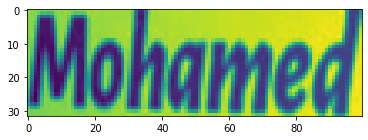

In [16]:
import matplotlib.pyplot as plt

plt.imshow(image_tensors[3].numpy()[0,:,:])
plt.show()